In [30]:
from hpsklearn import estimator, components
import numpy as np
from hyperopt import tpe
import sklearn.metrics
import sklearn.cross_validation
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import fonctions_auxiliaires as aux
%matplotlib inline
import warnings
import matplotlib.pyplot as plt

In [10]:
warnings.filterwarnings('ignore')

In [11]:
dataTrain = pd.read_csv('train_boson.csv', delimiter=',')
dataTest = pd.read_csv('test_boson.csv', delimiter=',')

In [12]:
y = dataTrain["Prediction"]
del dataTrain["Prediction"]
X = dataTrain

In [13]:
le = LabelEncoder()
y = le.fit_transform(y)

In [14]:
X_train, X_test, y_train, y_test = \
    sklearn.cross_validation.train_test_split(X, y, random_state=1)

### General results

In [15]:
estim = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=300, \
                                    fit_increment = 1, fit_increment_dump_filename='boson_logfile')

In [16]:
estim.fit(np.ascontiguousarray(X_train),np.ascontiguousarray(y_train))

In [17]:
y = estim.predict(X_test)
metrics_boson = aux.metrics(estim, X_train, y_train, X_test, y_test, y)

In [18]:
metrics_boson

(0.90250133333333338,
 0.63572799999999996,
 0.91748383816372481,
 0.66186334101865441,
 0.76898724544153896)

In [19]:
estim.trials.vals

{'clf': [0, 1, 3, 0, 1, 4, 5, 2, 2, 6],
 'clf.ada_boost.ada_boost_algo': [0],
 'clf.ada_boost.ada_boost_learning_rate': [0.012110723979515299],
 'clf.ada_boost.ada_boost_n_estimators': [94.0],
 'clf.ada_boost.ada_boost_rstate': [1],
 'clf.extra_trees.etc_bootstrap': [0],
 'clf.extra_trees.etc_criterion': [0],
 'clf.extra_trees.etc_max_depth': [0],
 'clf.extra_trees.etc_max_features': [2],
 'clf.extra_trees.etc_max_features.frac': [],
 'clf.extra_trees.etc_min_samples_leaf': [1],
 'clf.extra_trees.etc_min_samples_leaf.gt1': [6.0],
 'clf.extra_trees.etc_n_estimators': [45.0],
 'clf.extra_trees.etc_rstate': [0],
 'clf.grad_boosting.gradient_boosting_learning_rate': [0.19231351607307418],
 'clf.grad_boosting.gradient_boosting_max_depth': [0],
 'clf.grad_boosting.gradient_boosting_max_features': [3],
 'clf.grad_boosting.gradient_boosting_max_features.frac': [0.23578423134626225],
 'clf.grad_boosting.gradient_boosting_min_samples_leaf': [1],
 'clf.grad_boosting.gradient_boosting_min_samples_

In [20]:
print(estim.best_model()) 

{'learner': ExtraTreesClassifier(bootstrap=True, class_weight=None, criterion='gini',
           max_depth=None, max_features=None, max_leaf_nodes=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=45, n_jobs=1,
           oob_score=False, random_state=0, verbose=False,
           warm_start=False), 'preprocs': (MinMaxScaler(copy=True, feature_range=(0.0, 1.0)),), 'ex_preprocs': ()}


In [21]:
aux.time_retriever(estim)

{0: 1482225348.0,
 1: 1482225650.0,
 2: 1482225950.0,
 3: 1482226064.0,
 4: 1482226364.0,
 5: 1482226377.0,
 6: 1482226605.0,
 7: 1482226906.0,
 8: 1482227209.0,
 9: 1482227312.0}

TypeError: unorderable types: NoneType() <= NoneType()

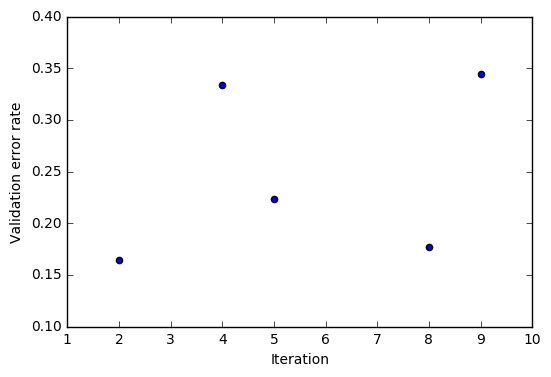

In [22]:
aux.plot_perf(estim)

### Intermediate results

In [23]:
estim_iter = estimator.hyperopt_estimator(classifier=components.any_classifier('clf'),algo=tpe.suggest, trial_timeout=300)

In [24]:
predictions, accuracies = aux.fit_intermediate(estim_iter, np.ascontiguousarray(X_train), np.ascontiguousarray(y_train),\
                                              X_test, y_test)

Trial 1 loss: 0.3446133333333333
Trial 2 loss: None
Trial 3 loss: None
Trial 4 loss: None
Trial 5 loss: 0.3711466666666666
Trial 6 loss: 0.22255999999999998
Trial 7 loss: 0.3464533333333333
Trial 8 loss: 0.48461333333333334
Trial 9 loss: 0.6553866666666667
Trial 10 loss: 0.3447733333333334
Test accuracy: 0.7724
Predict: [0 0 0 ..., 1 0 0]
Best Model: {'learner': RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features=0.1435445716834276,
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=135, n_jobs=1,
            oob_score=False, random_state=4, verbose=False,
            warm_start=False), 'preprocs': (), 'ex_preprocs': ()}
====End of demo====


In [25]:
metrics_iter = []
for i in range(0, len(predictions)-1):
    y = predictions[i]
    metrics_iter.append(aux.metrics(estim_iter, X_train, y_train, X_test, y_test, y))
metrics_iter

[(0.77311466666666662,
  0.77239999999999998,
  1.0,
  0.66081599999999996,
  0.79577268041733695),
 (0.77311466666666662,
  0.77239999999999998,
  1.0,
  0.66081599999999996,
  0.79577268041733695),
 (0.77311466666666662,
  0.77239999999999998,
  1.0,
  0.66081599999999996,
  0.79577268041733695),
 (0.77311466666666662,
  0.77239999999999998,
  1.0,
  0.66081599999999996,
  0.79577268041733695),
 (0.77311466666666662,
  0.77239999999999998,
  1.0,
  0.66081599999999996,
  0.79577268041733695),
 (0.77311466666666662,
  0.77239999999999998,
  0.94828212391951772,
  0.76413548210871352,
  0.84630760088595969),
 (0.77311466666666662,
  0.77239999999999998,
  0.94828212391951772,
  0.76413548210871352,
  0.84630760088595969),
 (0.77311466666666662,
  0.77239999999999998,
  0.94828212391951772,
  0.76413548210871352,
  0.84630760088595969),
 (0.77311466666666662,
  0.77239999999999998,
  0.94828212391951772,
  0.76413548210871352,
  0.84630760088595969)]

In [26]:
predictions

[array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0]),
 array([0, 0, 0, ..., 1, 0, 0])]

In [27]:
accuracies

[0.66081599999999996,
 0.66081599999999996,
 0.66081599999999996,
 0.66081599999999996,
 0.66081599999999996,
 0.77239999999999998,
 0.77239999999999998,
 0.77239999999999998,
 0.77239999999999998,
 0.77239999999999998]

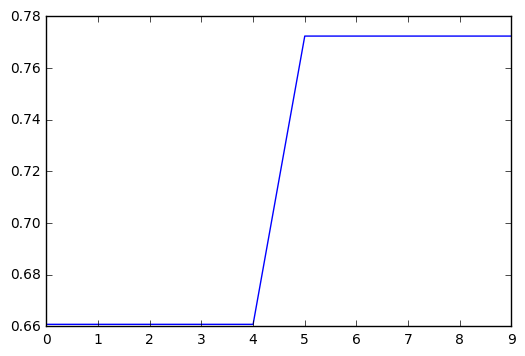

In [31]:
plt.plot(accuracies)
plt.show()